# Домашняя работа №2

In [102]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
#your answer here

Выборка - это часть генеральной совокупности

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
#your answer here

выборка считается репрезентативной, если у нее мат. ожидание и дисперсия совпадают с генеральной совокупностью,
размер выборки больше 200 не гарантирует этого, но и не противоречит.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
#your answer here

1. Длина волос футболистов сборной Франции на 5ти последних ЧМ по футболу.
2. Длина волос всех футболистов Франции в 2018 г.
3. Длина волос европейских команд на ЧМ по футболу в 2018 г.

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
#your answer here переписать

1. взять по 50 детей, родившихся в каждом род.доме в каждом году
2. взять по 100 детей за каждый год.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


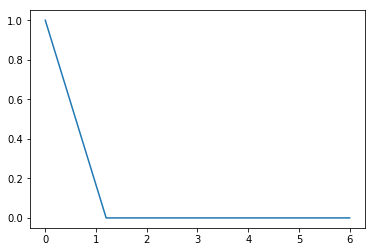

In [134]:
#равномерное распределение

sample = [1,2,3,4,5,6]

x = np.linspace(0,6, 6)
pdf = stats.uniform.pdf(sample)

plt.plot(x, pdf, label ='равномерное распределение')

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [31]:
# матожидание наиболее неустойчивое

gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = 25
sample_with_overshoot = sample
sample_with_overshoot[1]=overshoot
new_med = sorted(sample_with_overshoot)[24]
new_mean = sample_with_overshoot.mean()


print(med, mean)
print(new_med, new_mean)

3.6620250300109283 4.086785195070114
3.6791941445309115 4.534019135510503


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [49]:
#мат. ожидание при добавлении константы С увеличивается на величину С, при умножении на С - увеличивается в C раз
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()

sample_with_c = sample + C
mean_with_c = sample_with_c.mean()

sample_mult_c = sample*C
mean_mult_c = sample_mult_c.mean()

print(mean,C,mean_with_c,mean_mult_c)

2.21 0.5 2.71 1.105


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [67]:
#дисперсия увеличится

exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 15
sample_with_overshoot = sample
sample_with_overshoot[1] = overshoot
new_var = sample_with_overshoot.var()

print(var, new_var)

0.5731825294034303 2.621298963282443


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [107]:
# интервал (X¯−s2,X¯+s2)(X¯−s2,X¯+s2)  шире IQR

norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here

IQR = norm_rv.ppf(0.75)-norm_rv.ppf(0.25)
interval = 2*sample.var()
print(IQR, interval)

1.3489795003921632 1.9725531891732522


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [106]:
beta_rv = stats.beta(1,3)

#your code here
beta_rv.mean()

0.25

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [114]:
gamma_rv = stats.gamma(2,2)

#your code here
mean = gamma_rv.mean()
var = gamma_rv.var()
med = gamma_rv.median()

print(mean, var, med)


4.0 2.0 3.678346990016661


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

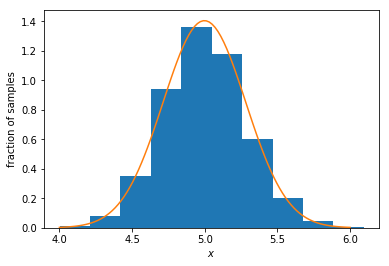

In [159]:
#your code here
norm_rv = stats.norm(5,2)
results = []


for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    
    results.append(sample.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')  


x = np.linspace(4,6,100)

norm_arr = np.array(results)


pdf = stats.norm(norm_arr.mean(), norm_arr.std()).pdf(x)

plt.plot(x, pdf)

#распределение нормальное

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

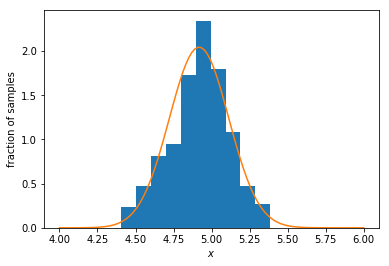

In [183]:
# 1) добавлены искусственные выбросы 100 и -100

norm_rv = stats.norm(5,2)
results = []


for i in range(300):
    sample = norm_rv.rvs(100)
    #добавим выбросы
    sample[1]=100
    sample[2]=-100
    
    results.append(sample.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')  


x = np.linspace(4,6,100)

norm_arr = np.array(results)


pdf = stats.norm(norm_arr.mean(), norm_arr.std()).pdf(x)

plt.plot(x, pdf)

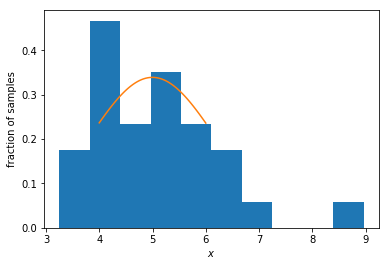

In [109]:
# 2) уменьшено количество испытаний и выборка
norm_rv = stats.norm(5,2)
results = []


for i in range(30):
    sample = norm_rv.rvs(3)
    results.append(sample.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')  


x = np.linspace(4,6,100)

norm_arr = np.array(results)


pdf = stats.norm(norm_arr.mean(), norm_arr.std()).pdf(x)

plt.plot(x, pdf)

- Сделайте z-преобразование для данного распределения

$$z = \frac{X_i - \bar{X}}{\sigma}$$

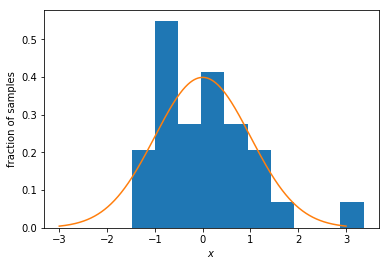

In [111]:
# это можно назвать нормальным распределением? стало немного лучше визуально, но не идеально

new_rv = (norm_arr - norm_arr.mean())/(norm_arr.var()**0.5)

plt.hist(new_rv, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')  


x = np.linspace(-3,3,10000)

new_pdf = stats.norm(new_rv.mean(), new_rv.std()).pdf(x)

plt.plot(x, new_pdf)


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

Доверительный интервал 90%: < 16.0


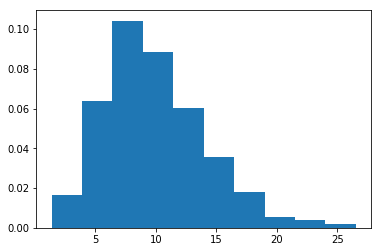

In [115]:
chi2_rv = stats.chi2(df = 10)
sample = chi2_rv.rvs(size = 1000)

plt.hist(sample, density = True)

#vals = chi2_rv.ppf([0.25, 0.5, 0.75])
#print(vals)

val = chi2_rv.ppf(0.9)

print(f'Доверительный интервал 90%: < {val:.3}')

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

Доверительный интервал 90%: 1.34
Доверительный интервал 95%: 1.75


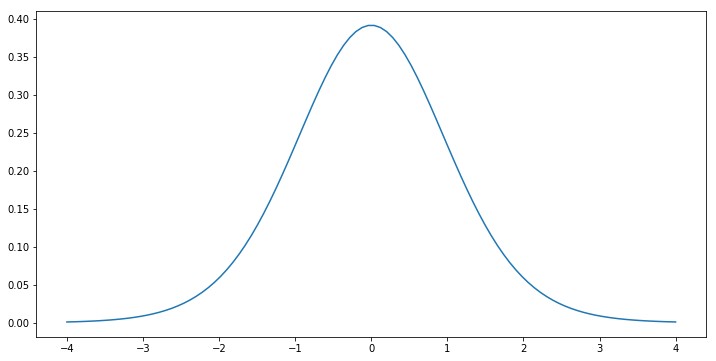

In [118]:
#шире ДИ 95%

t_rv = stats.t(15)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t_rv.pdf(x)
plt.plot(x, pdf)

print(f'Доверительный интервал 90%: {t_rv.ppf(0.90):.3}')
print(f'Доверительный интервал 95%: {t_rv.ppf(0.95):.3}')


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

-0.19027564017294585 2.11064400907692
-0.00817856530924315 2.0289578987224703


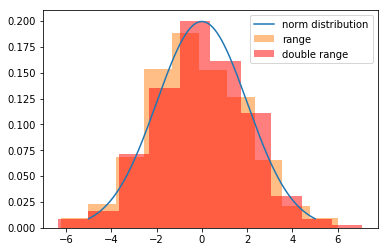

In [135]:
# ДИ выборки в 2 раза больше по размеру более приближен к нормальному распределению
norm_rv = stats.norm(0, 2)
#your code here

sample1 = norm_rv.rvs(size = 500)
sample2 = norm_rv.rvs(size = 1000)

print(sample1.mean(), sample1.std())
print(sample2.mean(), sample2.std())

x = np.linspace(-5, 5, 1000)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.hist(sample1, density = True,histtype='stepfilled', alpha = 0.5)
plt.hist(sample2, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

plt.legend(['norm distribution','range','double range'])

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here

Ошибка 2-го рода, ложноотрицательный результат. Должны были отвергнуть, но не сделали этого.

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [ ]:
#your answer here

Чем меньше p уровень значимости, тем сильнее получаемые различия.

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here

0.01 - т.к. это более широкий диапазон
вообще, не очень хорошая оценка

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

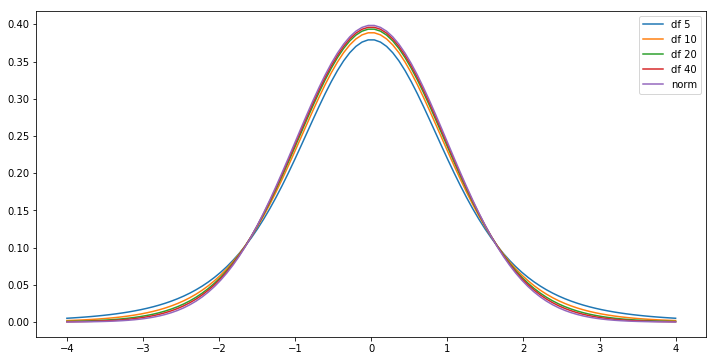

In [136]:
# при df 40 практически совпадает с нормальным распределением, чем меньше df, тем больше разброс на концах


x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

t_rv1 = stats.t(5)
pdf1 = t_rv1.pdf(x)
plt.plot(x, pdf1)

t_rv2 = stats.t(10)
pdf2 = t_rv2.pdf(x)
plt.plot(x, pdf2)

t_rv3 = stats.t(20)
pdf3 = t_rv3.pdf(x)
plt.plot(x, pdf3)

t_rv4 = stats.t(40)
pdf4 = t_rv4.pdf(x)
plt.plot(x, pdf4)

norm_rv = stats.norm(0,1)
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.legend(['df 5',  'df 10', 'df 20', 'df 40', 'norm'])


- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

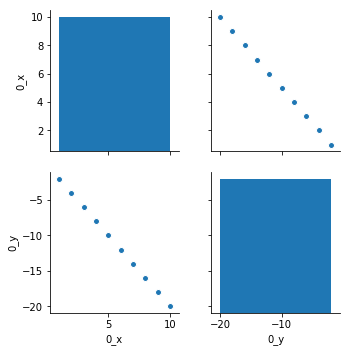

In [137]:
#your code here

sample1 = np.arange(1,11)

sample2 = -sample1*2


df1 = pd.DataFrame(sample1)
df2 = pd.DataFrame(sample2)


df_total = pd.merge(df1, df2, on=df1.index, how='outer')

df_total

corr = df_total.corr()

sns.pairplot(df_total, vars=['0_x', '0_y'],
                 kind='scatter')  

#sns.heatmap(corr, annot=True,
#            xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values)


- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [140]:
#методом подбора получилась нулевая корреляция :) 

sample1 = [1,2,3,4,5,6,5,4,3,2,1]
sample2 = [1,2,3,4,5,6,7,8,9,10,11]


df1 = pd.DataFrame(sample1)
df2 = pd.DataFrame(sample2)


df_total = pd.merge(df1, df2, on=df1.index, how='outer')

df_total

corr = df_total.corr()

corr
#sns.pairplot(df_total, vars=['0_x', '0_y'],
#                 kind='scatter')  


,key_0,0_x,0_y
key_0,1.0,0.0,1.0
0_x,0.0,1.0,0.0
0_y,1.0,0.0,1.0


- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [158]:
# страшно большое значение U, но решение вроде корректное

norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#присваиваем ранги значениям
data = list(enumerate(sorted(sample)))

sum1=sum2=0

for elem in data:
    if elem[1] in sample_1:
        sum1 += elem[0]
    if elem[1] in sample_2:
        sum2 +=elem[0]

if sum1 > sum2:
    u = len(sample_1)*len(sample_2)+(len(sample_1)*(len(sample_1)+1))/2 - sum1
else:
    u = len(sample_1)*len(sample_2)+(len(sample_2)*(len(sample_2)+1))/2 - sum2

print(u)

4843.0


Критерий Манна-Уитни
Пусть $n_1, n_2$ -- размер 1-й и второй выборок соответственно. $N = n_1 + n_2$

объединим обе выборки и произведем ранжирование
посчитаем сумму рангов для каждой выборки
$T_x \text{наибольшая из них, соответствующая выборке } n_x$
$$U = n_1 \cdot n_2 + \frac{n_x(n_x + 1)}{2} - T_x$$
Рассматриваем $U$ как p-value